# Développement d'un modèle d'intelligence artificielle de prédiction des maladies cardiaques -- Modèle KNN

## Importation des modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import preprocessing 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline


data_set = pd.read_csv('heart-disease.csv')
data_set.tail()

columns_translation = {
    'age': 'âge',
    'sex': 'sexe',
    'cp': 'type_douleur_poitrine',
    'trestbps': 'tension_arterielle_repos',
    'chol': 'cholestérol',
    'fbs': 'glycémie_à_jeun',
    'restecg': 'électrocardiogramme_repos',
    'thalach': 'fréquence_cardiaque_max',
    'exang': 'angine_induite_par_exercice',
    'oldpeak': 'dépression_sous_décalage',
    'slope': 'pente_segment_st',
    'ca': 'nombre_vaisseaux_colorés',
    'thal': 'thalassémie',
    'target': 'présence_maladie'
}
data_set.rename(columns=columns_translation, inplace=True)
data_set.head()

,âge,sexe,type_douleur_poitrine,tension_arterielle_repos,cholestérol,glycémie_à_jeun,électrocardiogramme_repos,fréquence_cardiaque_max,angine_induite_par_exercice,dépression_sous_décalage,pente_segment_st,nombre_vaisseaux_colorés,thalassémie,présence_maladie
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Analyse exploration des données

# Detection des valeurs abérrantes

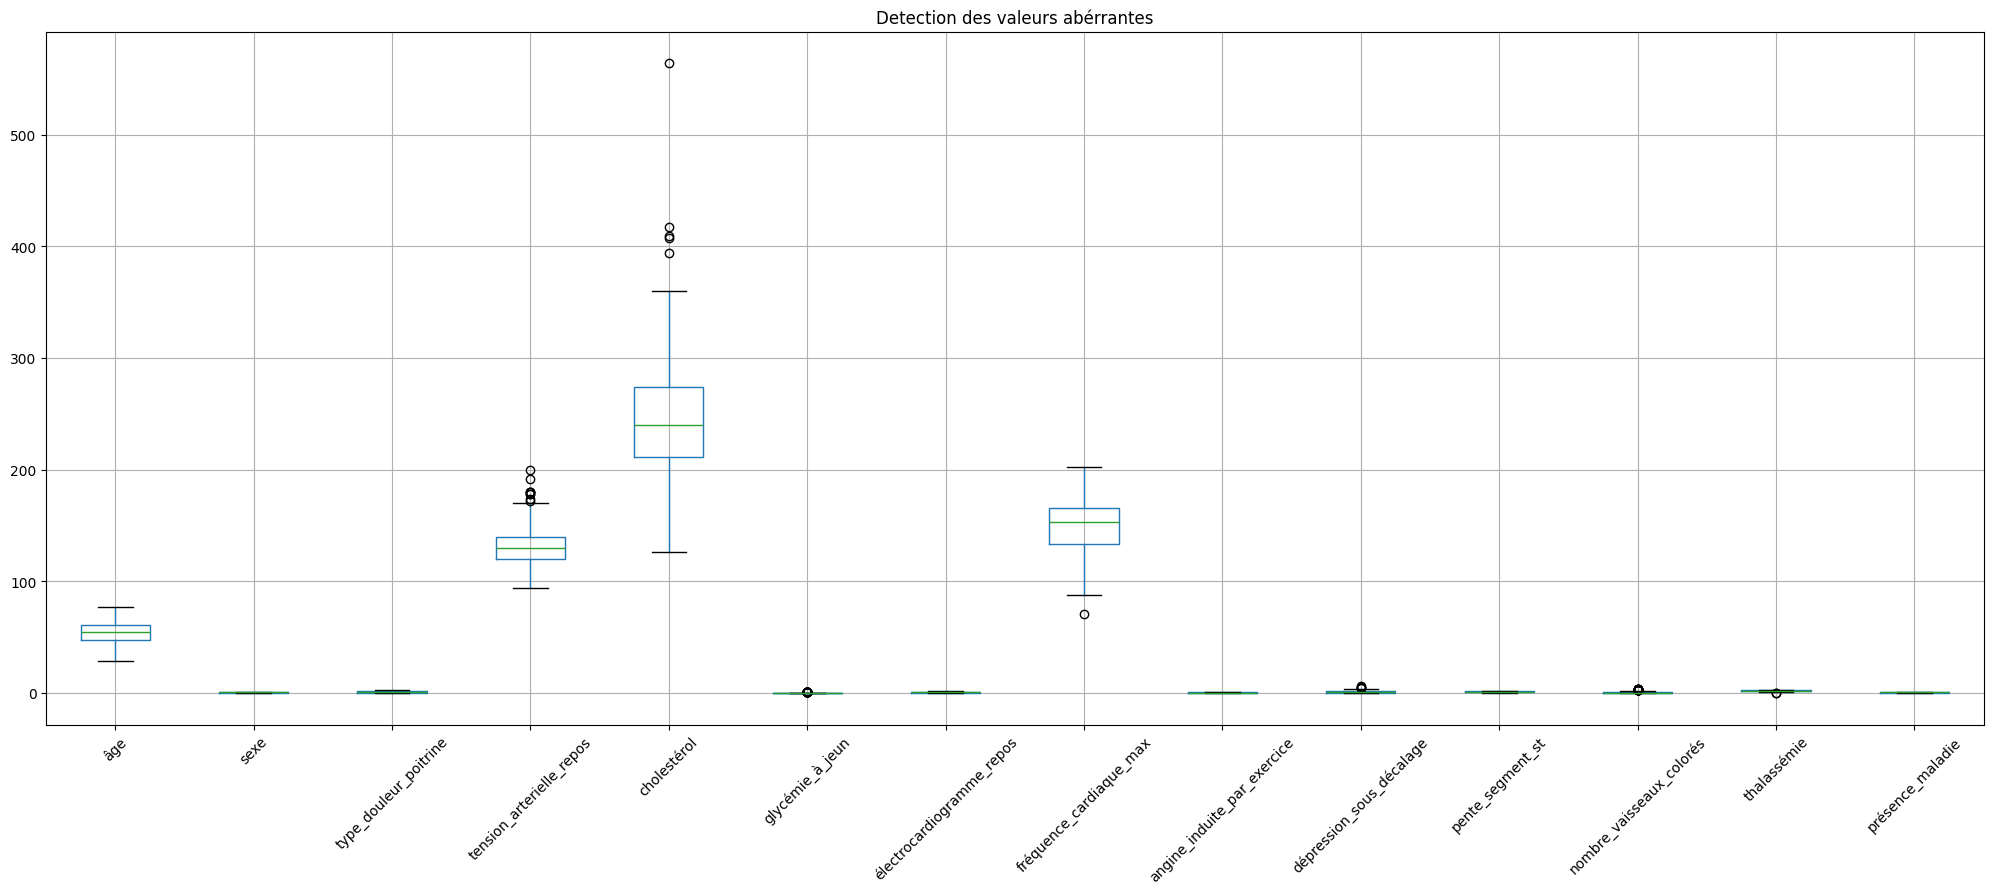

In [7]:
plt.figure(figsize=(25, 9))
data_set.boxplot()
plt.xticks(rotation=45)
plt.title("Detection des valeurs abérrantes")
plt.show()

# Suppression des doublons

In [3]:
data_set= data_set.drop_duplicates()
X = data_set.drop(columns='présence_maladie')  
y = data_set['présence_maladie'] 
print("Doublons : ", data_set.duplicated().sum())

Doublons :  0


# Fractionnement des données ( données Test & données d'apprentissage)

In [4]:
X_entrainement, X_test, y_entrainement, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
print ( "ensemble de données d'apprentissage : ",X_entrainement.shape)
print("ensemble de données de test :",X_test.shape)

ensemble de données d'apprentissage :  (241, 13)
ensemble de données de test : (61, 13)


# Données Test

In [5]:
patients = [f"patient_{i+1}" for i in range(len(y_test))]

df_patient = pd.DataFrame({
    "patient": patients,
    "etat de santé": ["Malade" if etat == 1 else "Sain" for etat in y_test]
})
df_patient

,patient,etat de santé
0,patient_1,Sain
1,patient_2,Malade
2,patient_3,Sain
3,patient_4,Sain
4,patient_5,Malade
...,...,...
56,patient_57,Malade
57,patient_58,Sain
58,patient_59,Malade
59,patient_60,Malade


# Normalisation des données

In [6]:
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1)) 
X_scaled = data_scaler_minmax.fit_transform(X_entrainement)
X_entrainement =  pd.DataFrame(X_scaled, columns=X_entrainement.columns)
X_scaled_test =data_scaler_minmax.transform(X_test)
X_test =  pd.DataFrame(X_scaled_test, columns=X_test.columns)
X_entrainement.head()


#joblib.dump(data_scaler_minmax, 'scaler.pkl')


,âge,sexe,type_douleur_poitrine,tension_arterielle_repos,cholestérol,glycémie_à_jeun,électrocardiogramme_repos,fréquence_cardiaque_max,angine_induite_par_exercice,dépression_sous_décalage,pente_segment_st,nombre_vaisseaux_colorés,thalassémie
0,0.291667,0.0,0.666667,0.264151,0.189376,0.0,0.5,0.717557,0.0,0.032258,0.5,0.00,0.666667
1,0.770833,0.0,0.666667,0.490566,0.339492,0.0,0.0,0.618321,0.0,0.000000,0.5,0.25,0.666667
2,0.604167,1.0,0.666667,0.433962,0.184758,1.0,0.0,0.717557,0.0,0.000000,1.0,0.00,0.666667
3,0.708333,0.0,0.000000,0.283019,0.152425,0.0,0.5,0.496183,1.0,0.000000,0.5,0.00,0.666667
4,0.583333,1.0,0.000000,0.150943,0.471132,0.0,0.5,0.549618,1.0,0.483871,0.5,0.25,1.000000


# Détermination de la valeur K

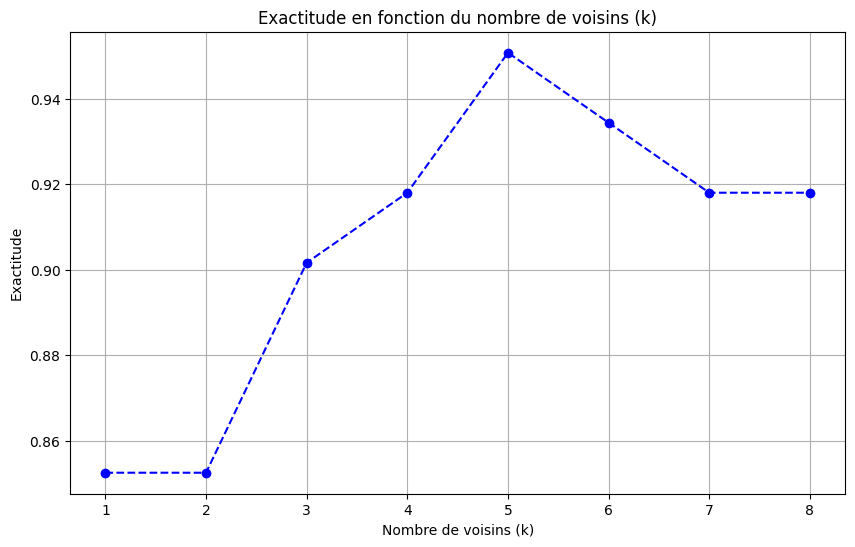

In [8]:
k_values = range(1, 9)
accuracies = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan',weights='uniform')
    knn.fit(X_entrainement, y_entrainement)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('Exactitude en fonction du nombre de voisins (k)')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Exactitude')
plt.grid(True)
plt.show()

# Entraînement du modèle KNN

In [9]:
classifieur =  KNeighborsClassifier(n_neighbors=5,metric='manhattan',weights='distance')
classifieur.fit(X_entrainement,y_entrainement)
print("Exactitude des prédictions: {:.2f}".format(classifieur.score(X_test, y_test)))

Exactitude des prédictions: 0.95


In [10]:
X_entrainement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   âge                          241 non-null    float64
 1   sexe                         241 non-null    float64
 2   type_douleur_poitrine        241 non-null    float64
 3   tension_arterielle_repos     241 non-null    float64
 4   cholestérol                  241 non-null    float64
 5   glycémie_à_jeun              241 non-null    float64
 6   électrocardiogramme_repos    241 non-null    float64
 7   fréquence_cardiaque_max      241 non-null    float64
 8   angine_induite_par_exercice  241 non-null    float64
 9   dépression_sous_décalage     241 non-null    float64
 10  pente_segment_st             241 non-null    float64
 11  nombre_vaisseaux_colorés     241 non-null    float64
 12  thalassémie                  241 non-null    float64
dtypes: float64(13)
memor

# Evaluation du modèle

In [11]:
print("Prédictions sur les données test: {}".format(classifieur.predict(X_test)))
print("Exactitude des prédictions: {:.2f}".format(classifieur.score(X_test, y_test)))

Prédictions sur les données test: [0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]
Exactitude des prédictions: 0.95


In [9]:
joblib.dump(classifieur, 'modele.pkl')

['modele.pkl']

# Matrice de Confusion du modèle KNN

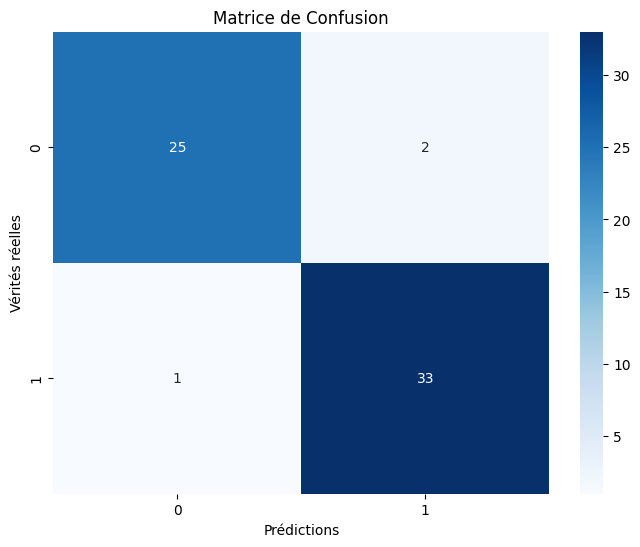

In [13]:
def_y_pred = classifieur.predict(X_test)
matrice_confusion = confusion_matrix(y_test, def_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(matrice_confusion, annot=True, fmt='d', cmap='Blues')

plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités réelles')
plt.show()

# Rapport d'évaluation du modèle

In [14]:
rapport = classification_report(y_test, def_y_pred, target_names=['Absence de maladie', 'Présence de maladie'])
print(rapport)

                     precision    recall  f1-score   support

 Absence de maladie       0.96      0.93      0.94        27
Présence de maladie       0.94      0.97      0.96        34

           accuracy                           0.95        61
          macro avg       0.95      0.95      0.95        61
       weighted avg       0.95      0.95      0.95        61



# Mesure de l'accuracy, la precision et le rappel

In [15]:
exactitude = accuracy_score(y_test,def_y_pred)
precision = precision_score(y_test,def_y_pred)
rappel = recall_score(y_test,def_y_pred)
print(f" Exactitude : { exactitude *100: .2f}")
print(f" precision : { precision *100: .2f}")
print(f" rappel : { rappel*100: .2f}")


 Exactitude :  95.08
 precision :  94.29
 rappel :  97.06


In [16]:
accuracy = accuracy_score(y_test, def_y_pred)

# Afficher l'exactitude en pourcentage
print(f"Exactitude du modèle KNN : {accuracy * 100:.2f}%")

Exactitude du modèle KNN : 95.08%


# Detection de la valeur de L'AUC

In [17]:

y_probs = classifieur.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
print(f'AUC : {auc:.3f}')

AUC : 0.955


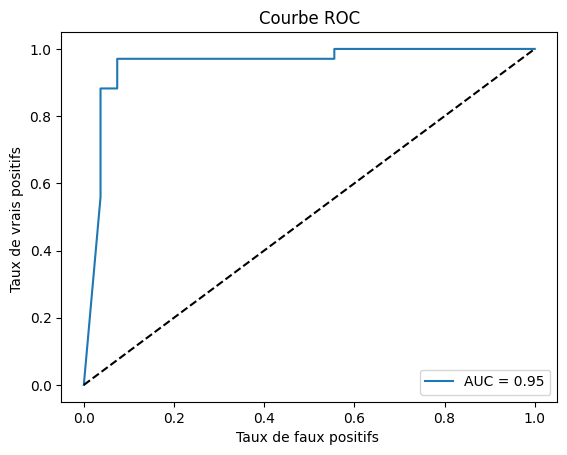

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Courbe aléatoire (ligne diagonale)
plt.xlabel('Taux de faux positifs ')
plt.ylabel('Taux de vrais positifs ')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [4]:
import joblib
joblib.dump(classifieur, 'knn_model.pkl')

['knn_model.pkl']